In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "Picotin Daily Report (Responses).xlsx"
df = pd.read_excel(path, engine='openpyxl')

In [3]:
df_copy = df.copy()
df = df.dropna(axis=1, how='all')
if 'Timestamp' in df.columns:
    df = df.drop(columns=['Timestamp'])
df['date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Dinner Lunch Sales': 'Dinner Sales'})

pd.set_option('display.max_columns', None)

In [4]:
meal_times = ['Breakfast', 'Lunch', 'Evening', 'Dinner', 'Night']

for meal in meal_times:
    if f'{meal} Sales to Kitchen Staff Ratio' not in df.columns: 
        df[f'{meal} Sales to Kitchen Staff Ratio'] = df[f'{meal} Sales']/df[f'Number of {meal} Kitchen Staff']
        df[f'{meal} Sales to Kitchen Staff Ratio'] = df[f'{meal} Sales to Kitchen Staff Ratio'].fillna(0)
        df[f'{meal} Sales to Kitchen Staff Ratio'] = np.log1p(df[f'{meal} Sales to Kitchen Staff Ratio'])
        threshold = 10
        df[f'{meal} Sales to Kitchen Staff Ratio'] = df[f'{meal} Sales to Kitchen Staff Ratio'].clip(upper=threshold)

for meal in meal_times:
    if f'Total {meal} Staff' not in df.columns:
        df[f'Total {meal} Staff'] = df[f'Number of {meal} Kitchen Staff'] + df[f'Number of {meal} Floor Staff']
        df[f'{meal} Sales to Staff Ratio'] = df[f'{meal} Sales'] / df[f'Total {meal} Staff']
        df[f'{meal} Sales to Staff Ratio'] = df[f'{meal} Sales to Staff Ratio'].fillna(0)
        df[f'{meal} Sales to Staff Ratio'] = np.log1p(df[f'{meal} Sales to Staff Ratio'])
        threshold = df[f'{meal} Sales to Staff Ratio'].quantile(0.90)
        df[f'{meal} Sales to Staff Ratio'] = df[f'{meal} Sales to Staff Ratio'].clip(upper=threshold)


for meal in meal_times:
    if f'{meal} Sales to Floor Staff Ratio' not in df.columns: 
        df[f'{meal} Sales to Floor Staff Ratio'] = df[f'{meal} Sales']/df[f'Number of {meal} Floor Staff']
        df[f'{meal} Sales to Floor Staff Ratio'] = df[f'{meal} Sales to Floor Staff Ratio'].fillna(0)
        df[f'{meal} Sales to Floor Staff Ratio'] = np.log1p(df[f'{meal} Sales to Floor Staff Ratio'])
        threshold = df[f'{meal} Sales to Floor Staff Ratio'].quantile(0.95)
        df[f'{meal} Sales to Floor Staff Ratio'] = df[f'{meal} Sales to Floor Staff Ratio'].clip(upper=threshold)

if 'Total Staff Hours' not in df.columns:
    df['Total Staff Hours'] = df['Total Floor Staff Hours'] + df['Total Kitchen Staff Hours']
    df['Total Staff Hours'] = df['Total Staff Hours'].fillna(0)
    df['Sales Efficiency'] = df['Total Sales']/df['Total Staff Hours']
    df['Sales Efficiency'] = df['Sales Efficiency'].fillna(0)
    df['Sales Efficiency'] = np.log1p(df['Sales Efficiency'])
    threshold = df['Sales Efficiency'].quantile(0.95)





c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


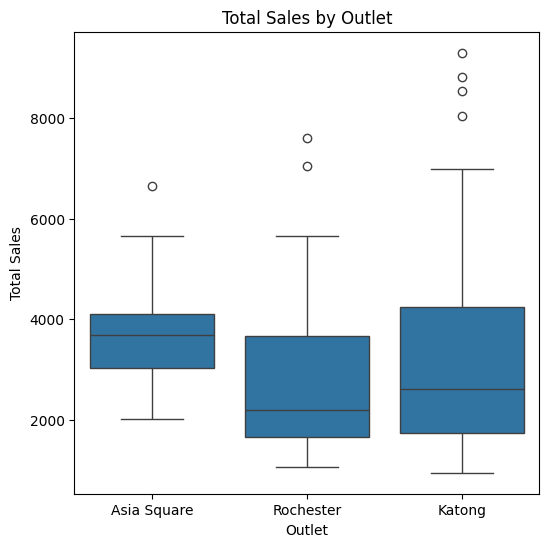

In [5]:
# Assuming 'Outlet' is the column name for the outlets
plt.figure(figsize=(6, 6))
sns.boxplot(x='Outlet', y='Total Sales', data=df)
plt.title('Total Sales by Outlet')
plt.xlabel('Outlet')
plt.ylabel('Total Sales')
plt.show()

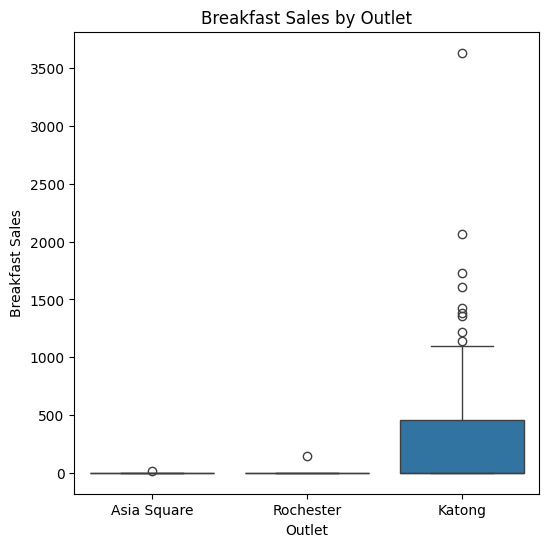

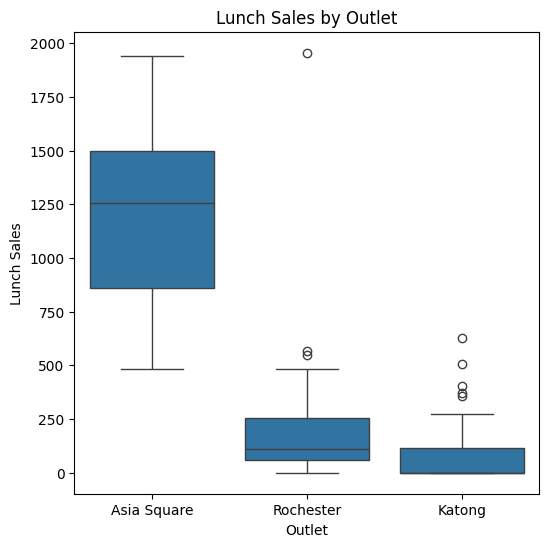

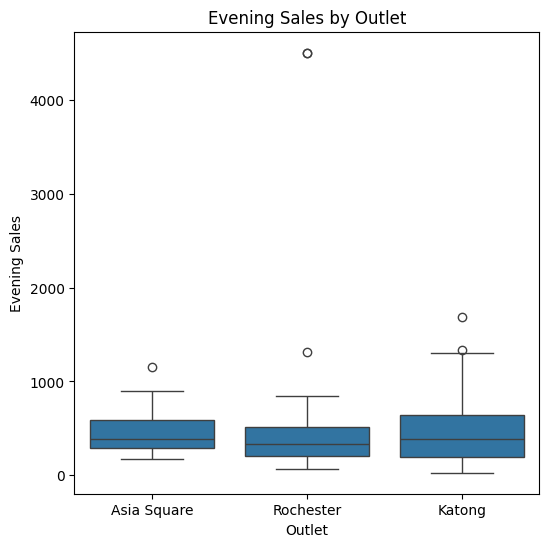

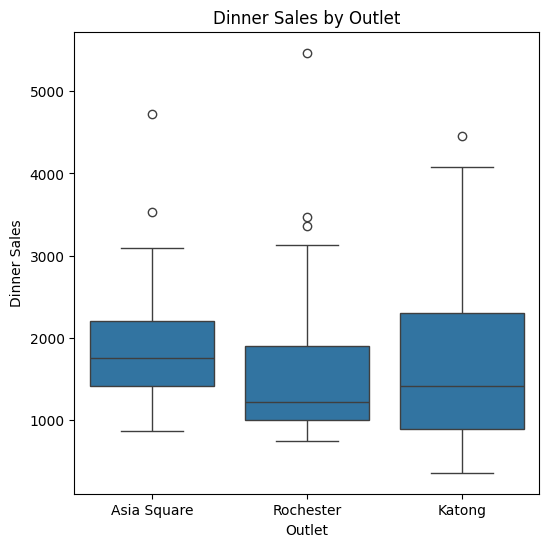

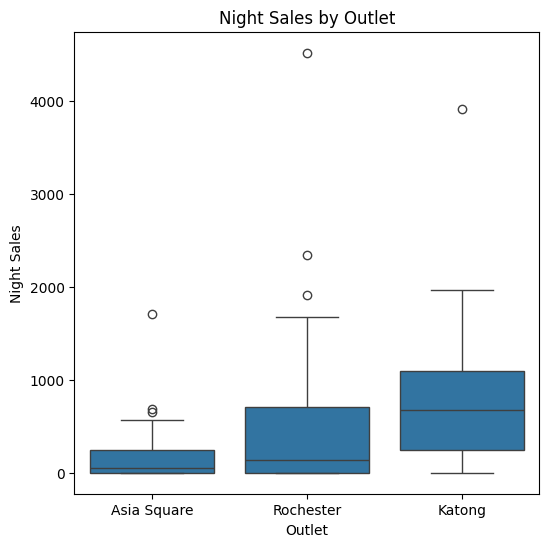

In [6]:
meal_times = ['Breakfast', 'Lunch', 'Evening', 'Dinner', 'Night']

for meal in meal_times:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='Outlet', y=f'{meal} Sales', data=df)
    plt.title(f'{meal} Sales by Outlet')
    plt.xlabel('Outlet')
    plt.ylabel(f'{meal} Sales')
    plt.show()

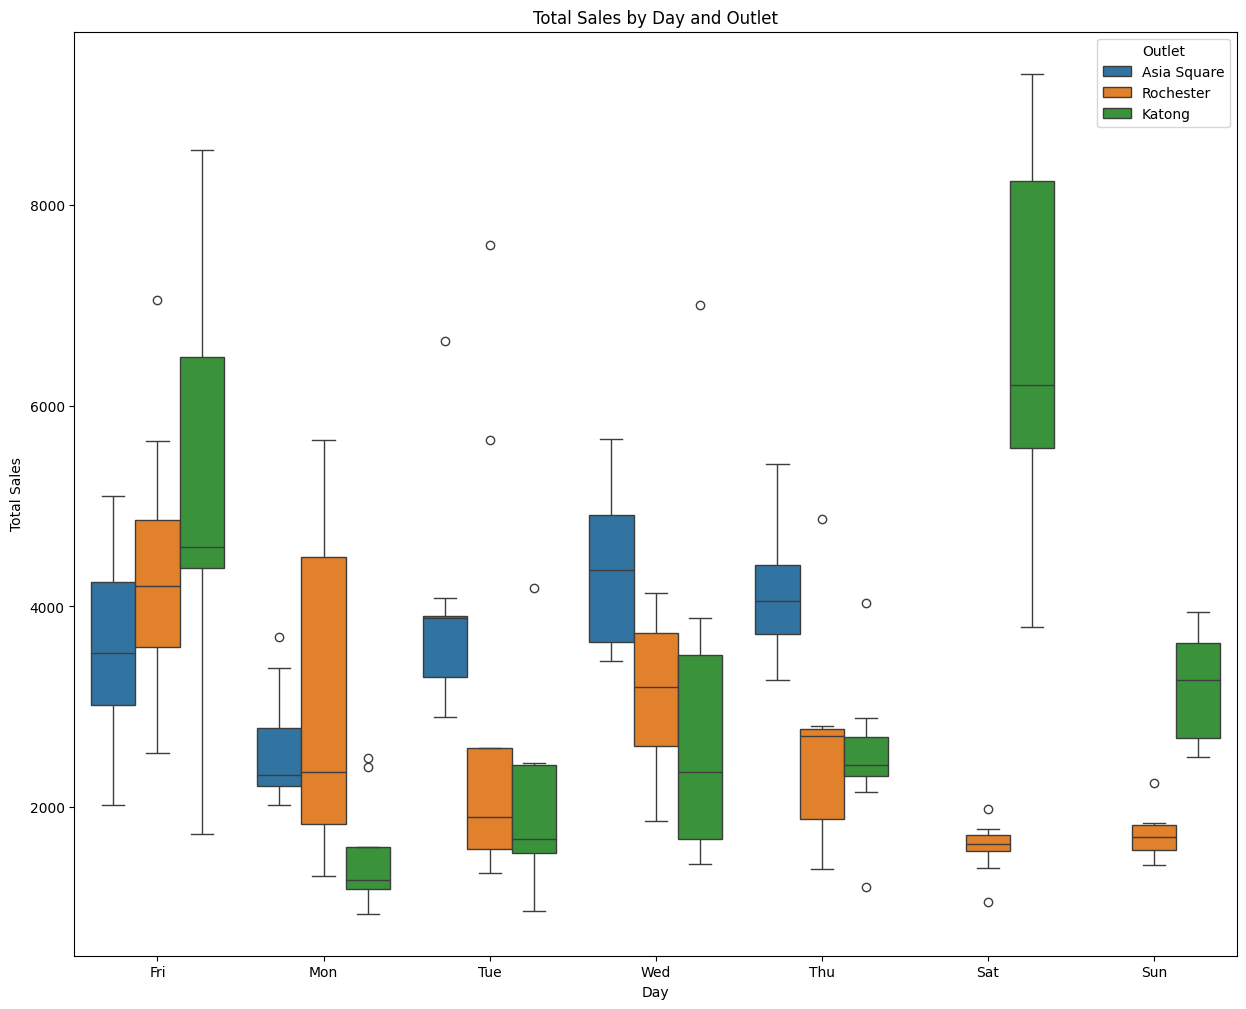

In [7]:
plt.figure(figsize=(15, 12))
sns.boxplot(x='Day', y=f'Total Sales', hue='Outlet', data=df)
plt.title(f'Total Sales by Day and Outlet')
plt.xlabel('Day')
plt.ylabel(f'Total Sales')
plt.legend(title='Outlet')
plt.show()

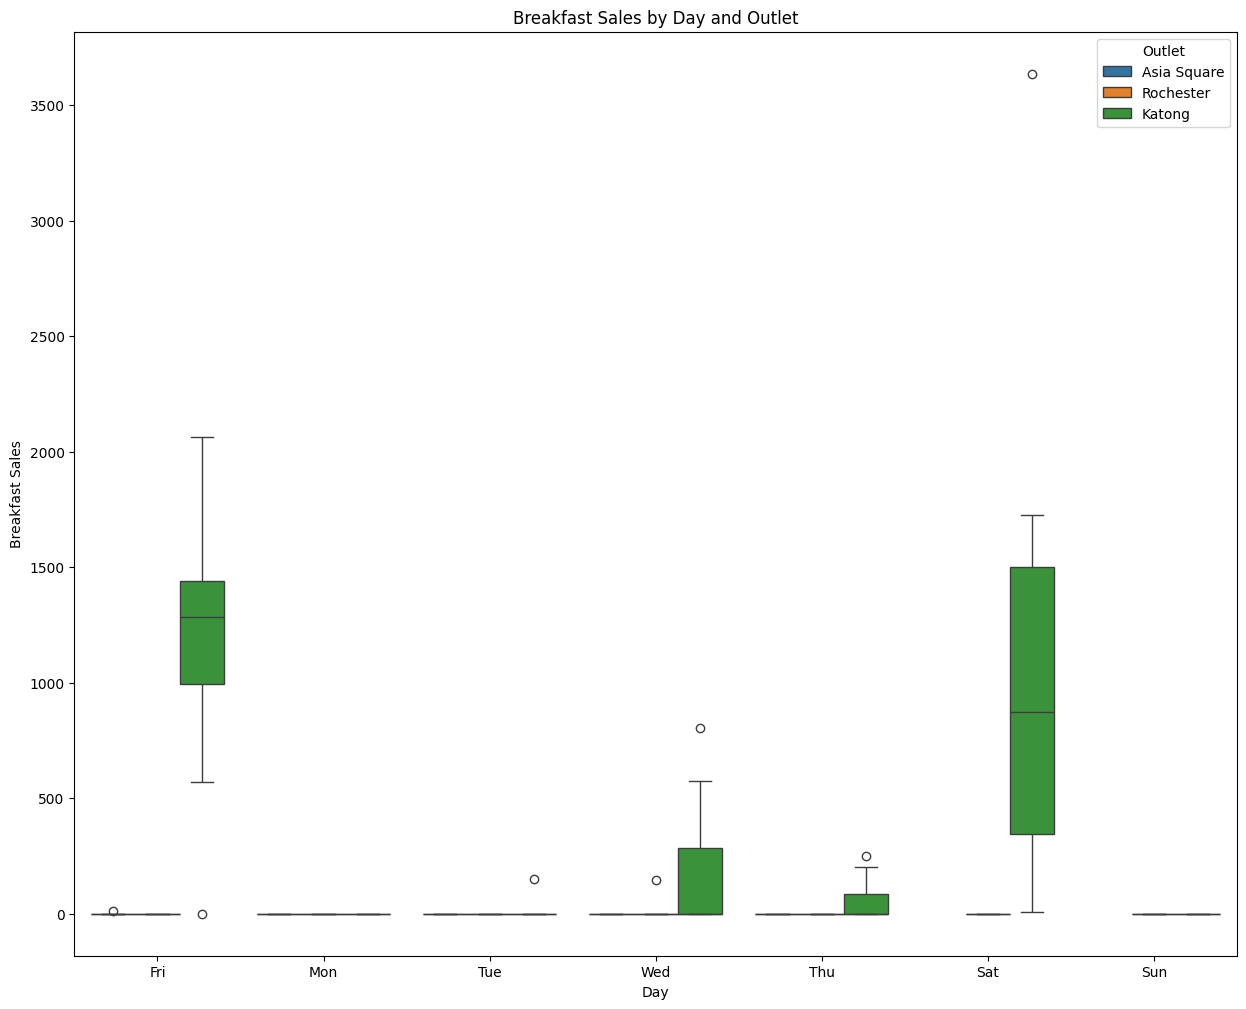

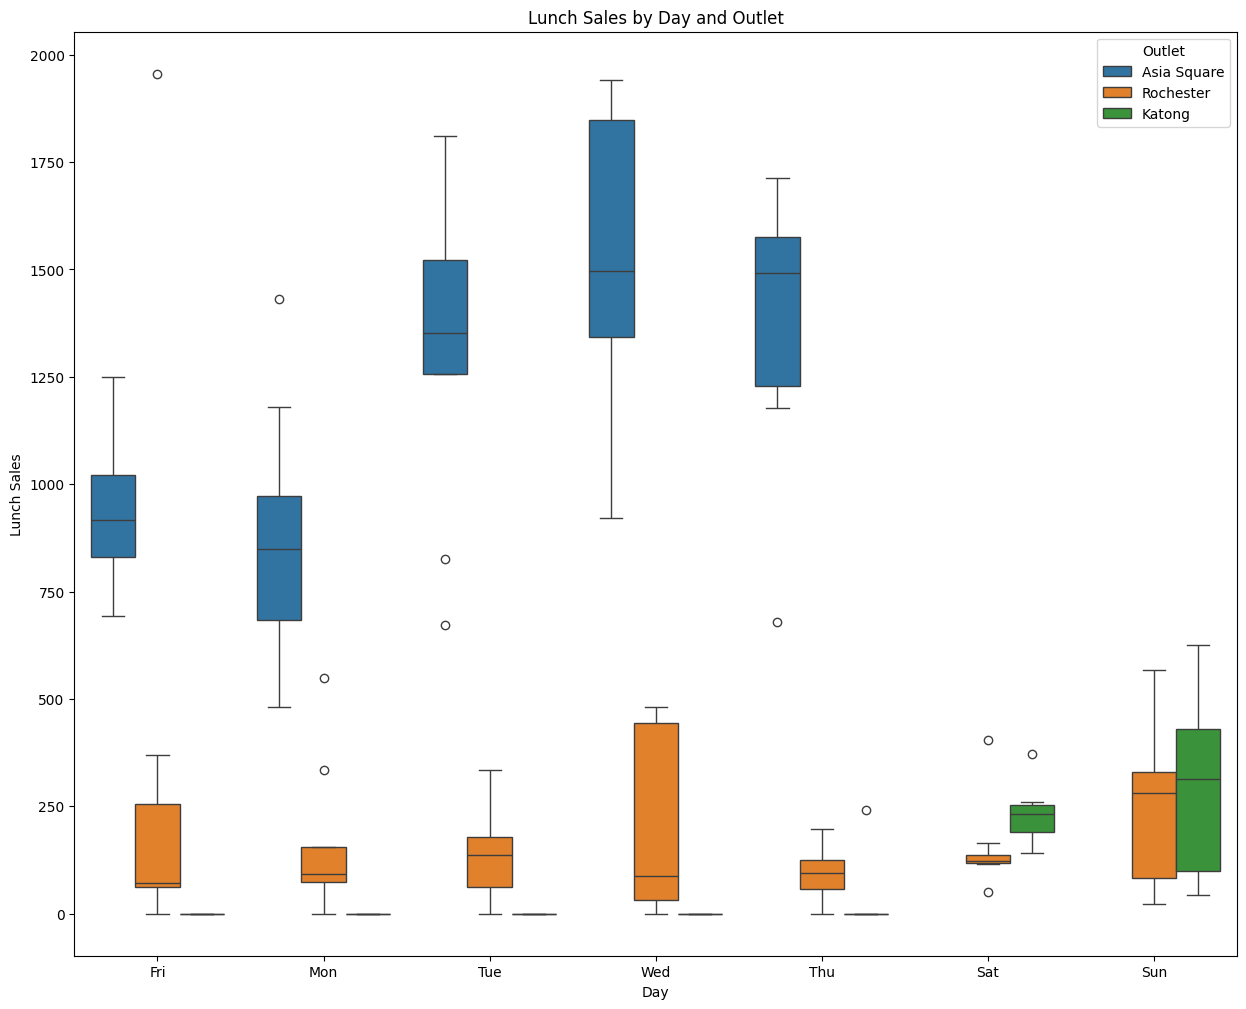

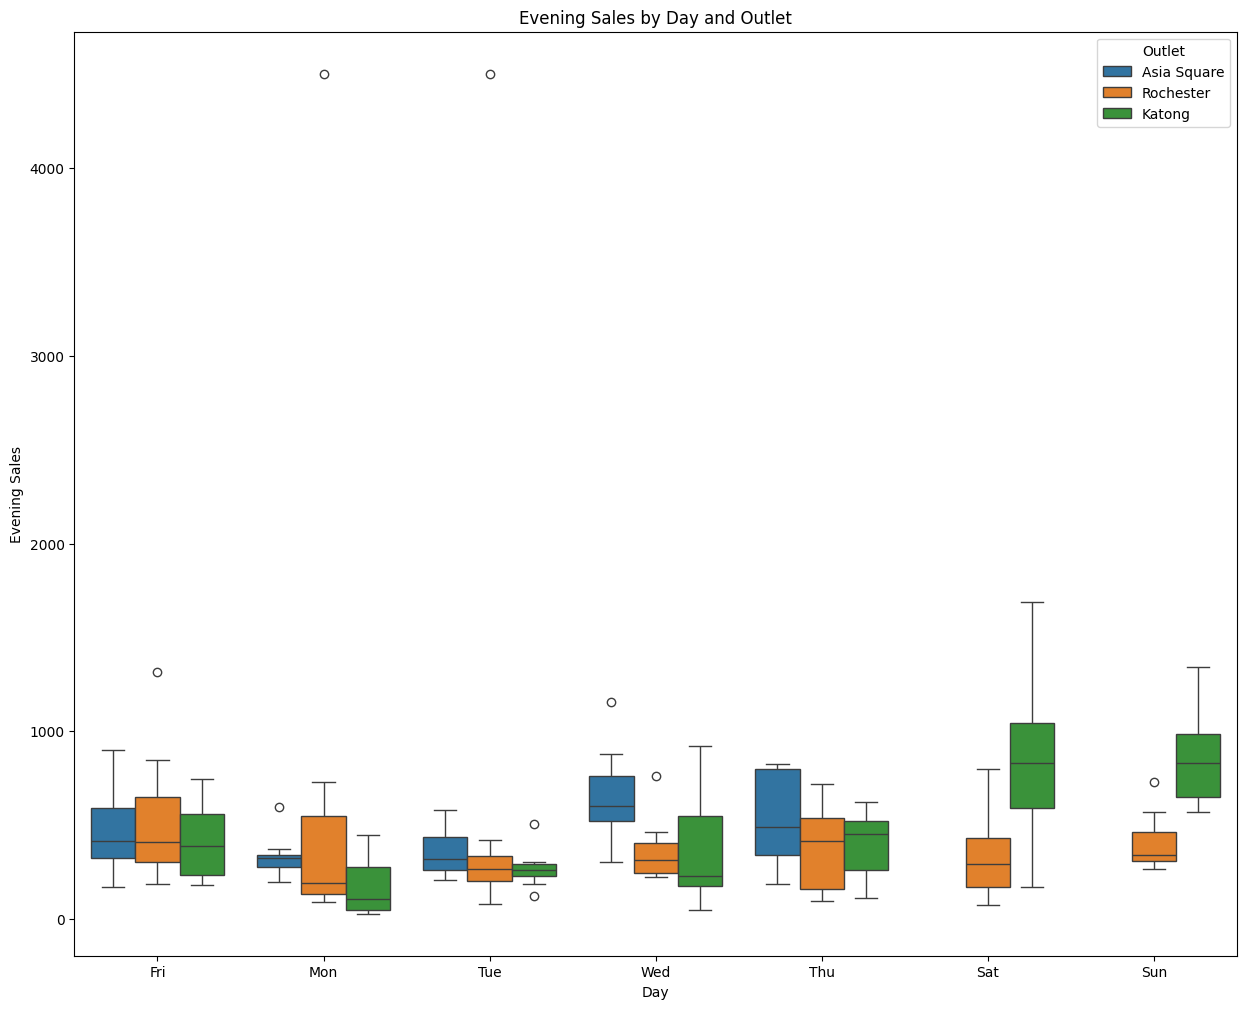

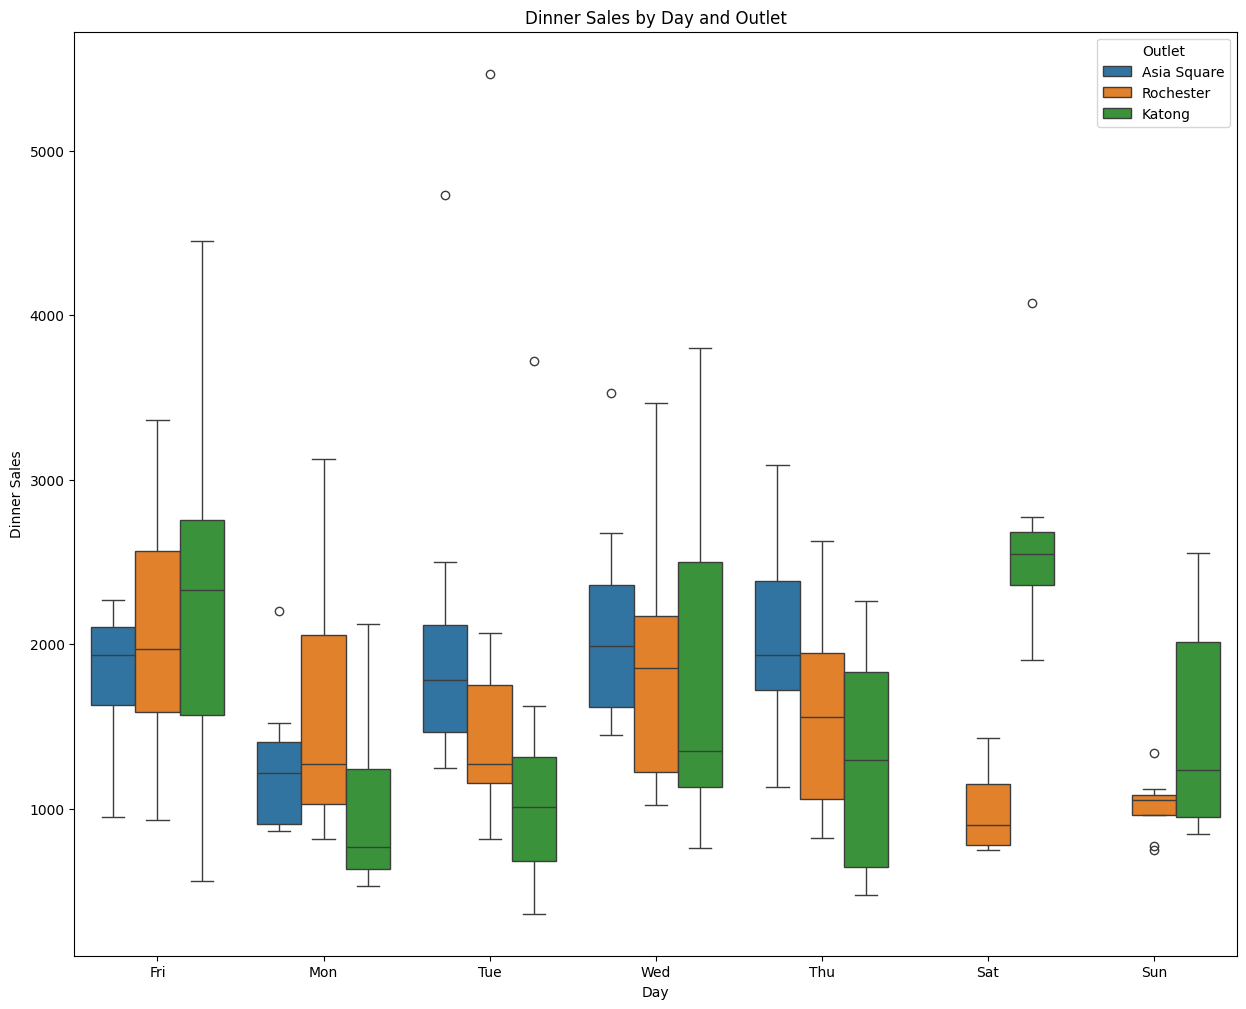

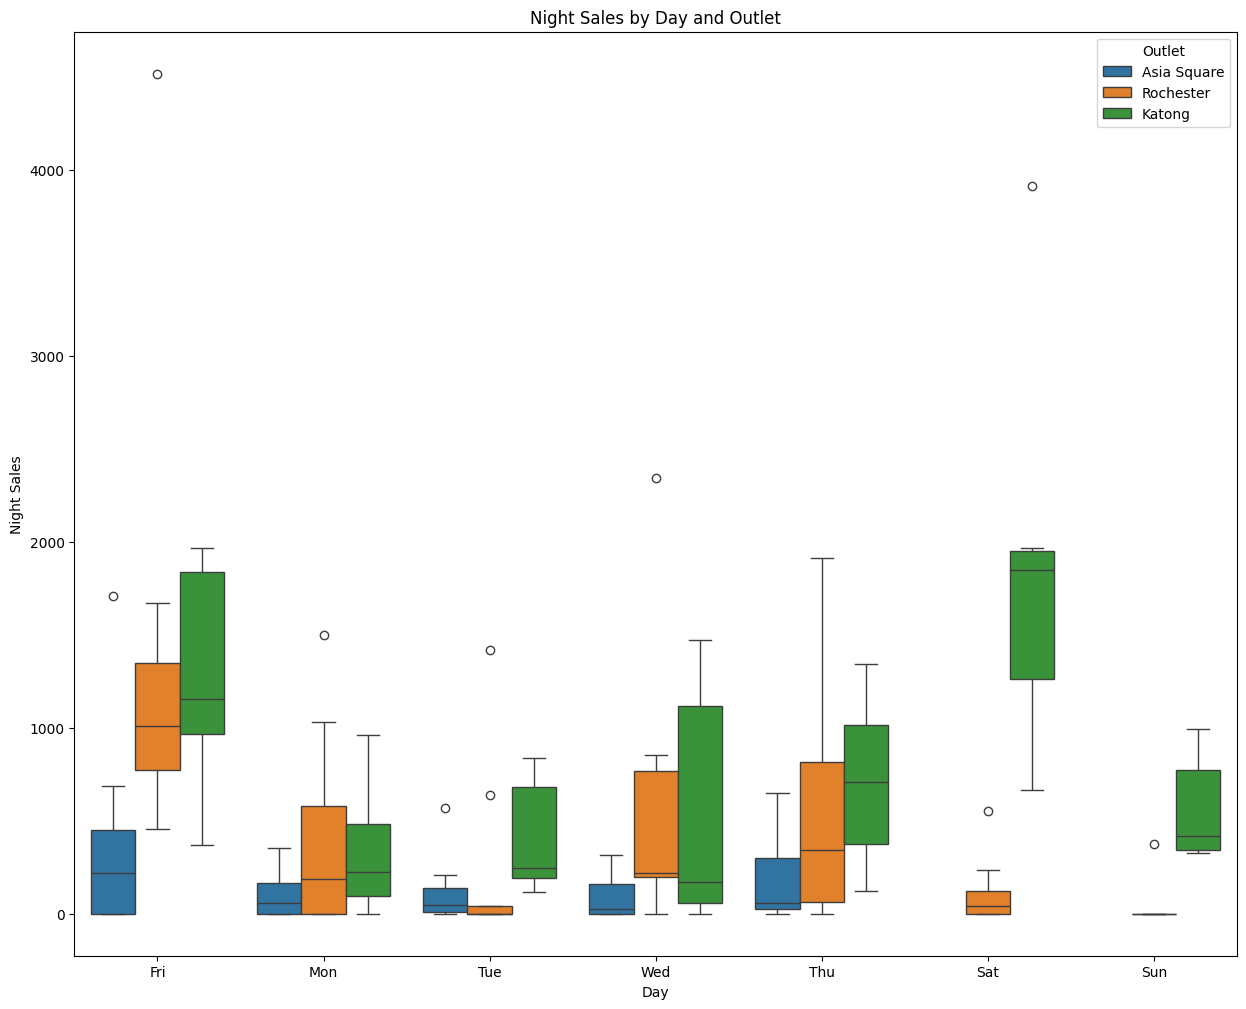

In [8]:
meal_times = ['Breakfast', 'Lunch', 'Evening', 'Dinner', 'Night']

for meal in meal_times:
    plt.figure(figsize=(15, 12))
    sns.boxplot(x='Day', y=f'{meal} Sales', hue='Outlet', data=df)
    plt.title(f'{meal} Sales by Day and Outlet')
    plt.xlabel('Day')
    plt.ylabel(f'{meal} Sales')
    plt.legend(title='Outlet')
    plt.show()

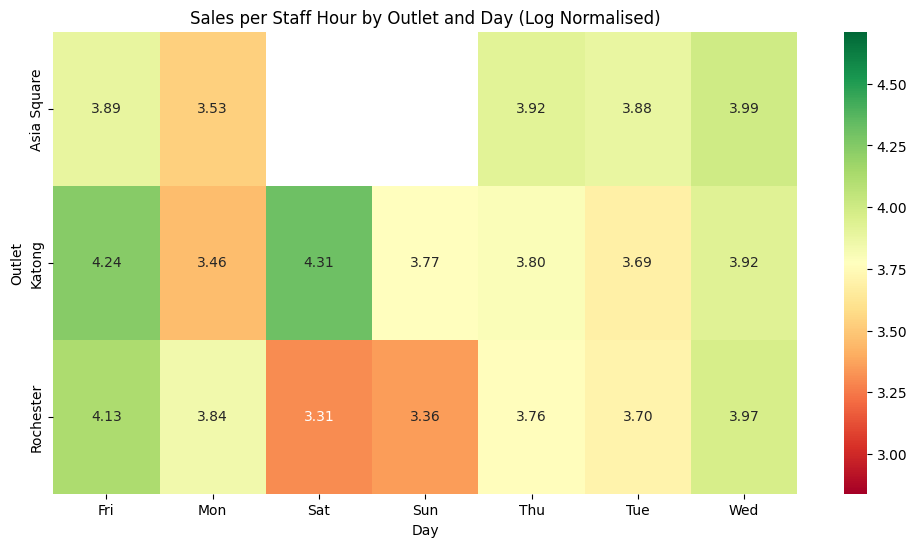

In [12]:
# Assuming 'Day' is the column name for the days
heatmap_data = df.pivot_table(index='Outlet', columns='Day', values='Sales Efficiency', aggfunc='mean')

# Create the heatmap with the specified color map
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', fmt='.2f', vmin=df['Sales Efficiency'].min(), vmax=df['Sales Efficiency'].max())
plt.title('Sales per Staff Hour by Outlet and Day (Log Normalised)')
plt.xlabel('Day')
plt.ylabel('Outlet')
plt.show()

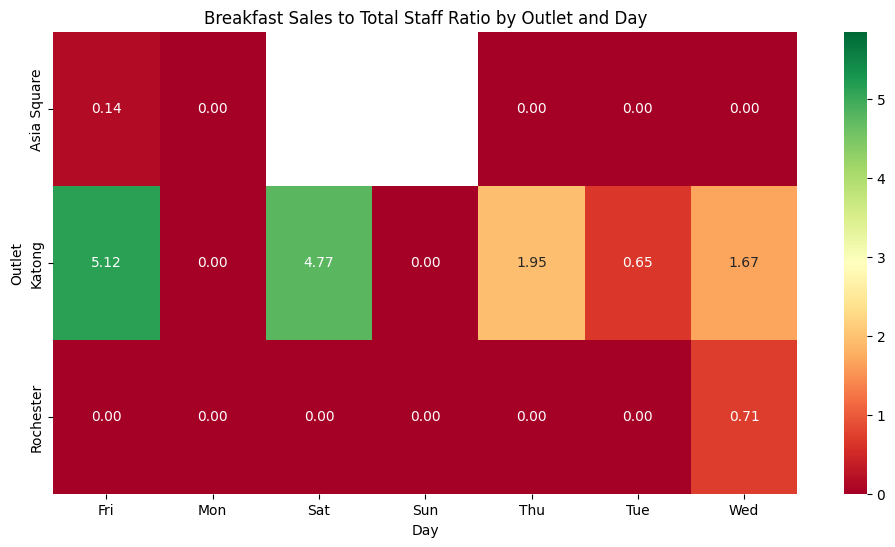

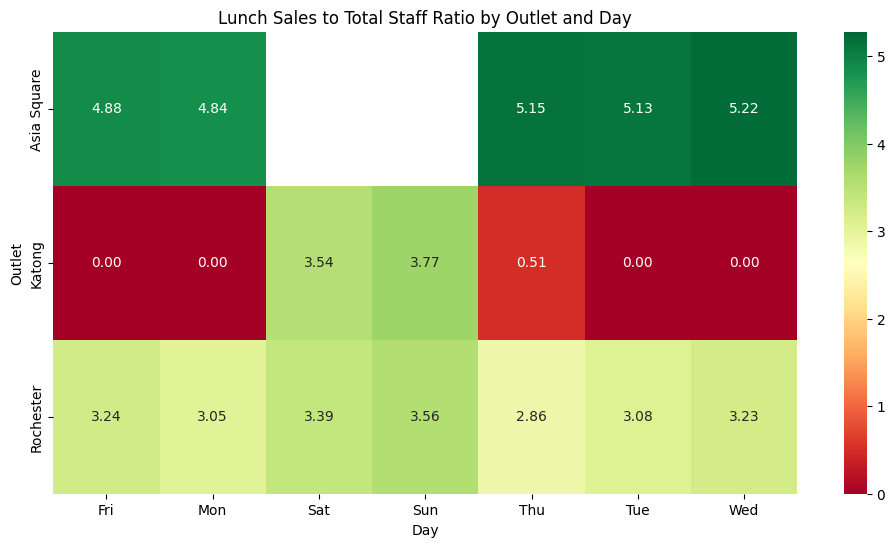

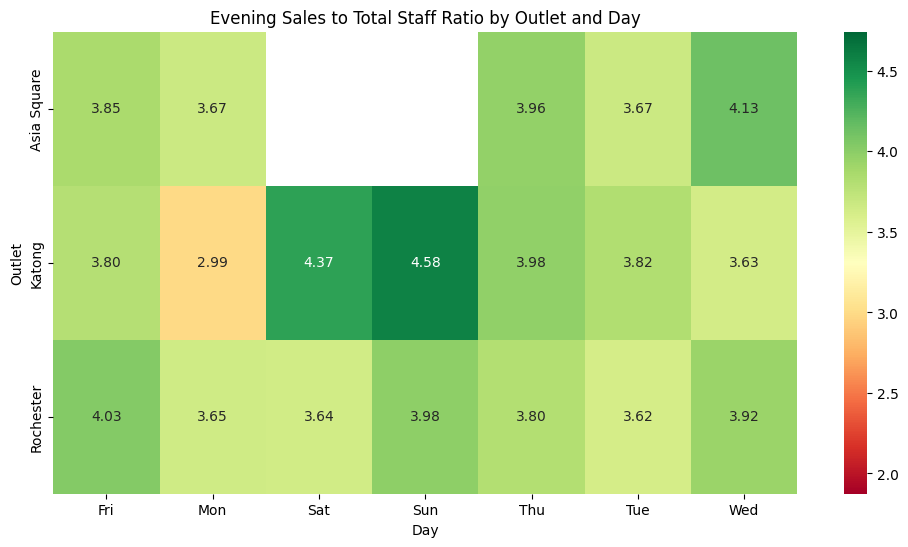

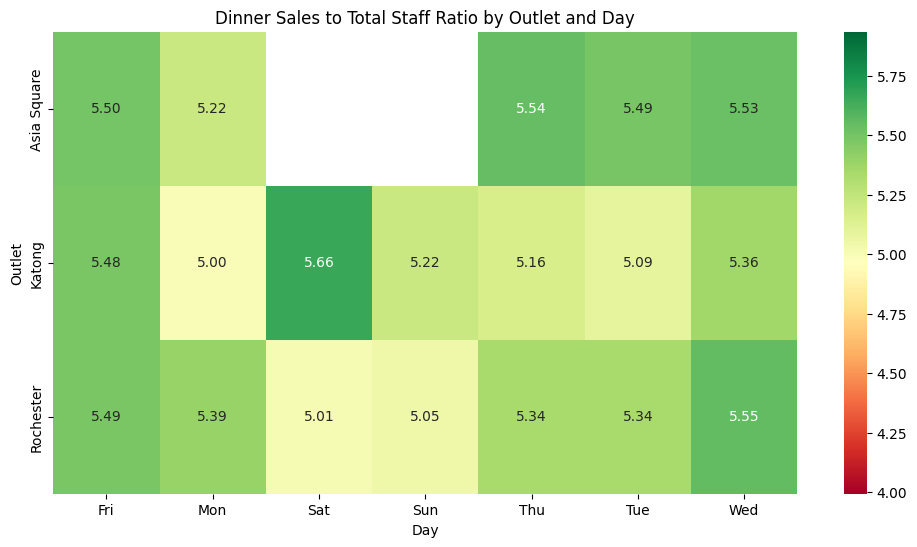

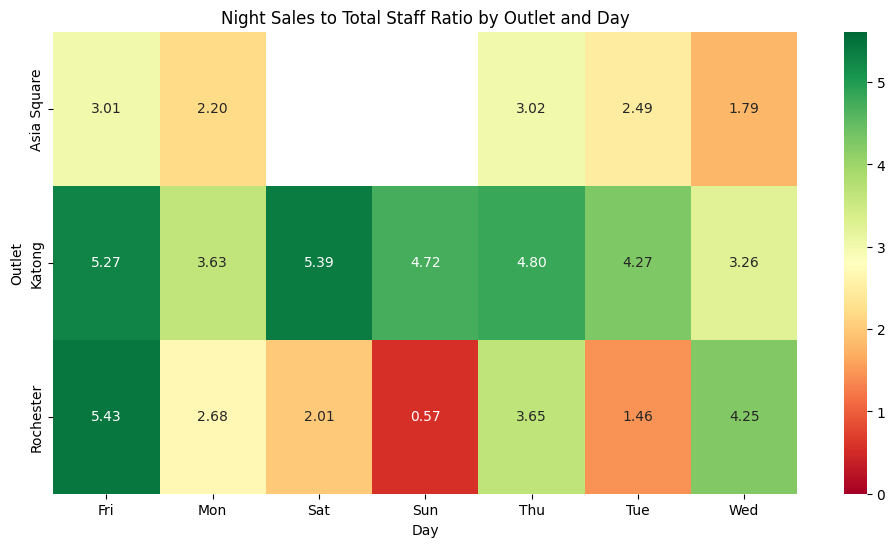

In [10]:
# Assuming 'Day' is the column name for the days
for meal in meal_times:
    heatmap_data = df.pivot_table(index='Outlet', columns='Day', values=f'{meal} Sales to Staff Ratio', aggfunc='mean')

    # Create the heatmap with the specified color map
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', fmt='.2f', vmin=df[f'{meal} Sales to Staff Ratio'].min(), vmax=df[f'{meal} Sales to Staff Ratio'].max())
    plt.title(f'{meal} Sales to Total Staff Ratio by Outlet and Day')
    plt.xlabel('Day')
    plt.ylabel('Outlet')
    plt.show()

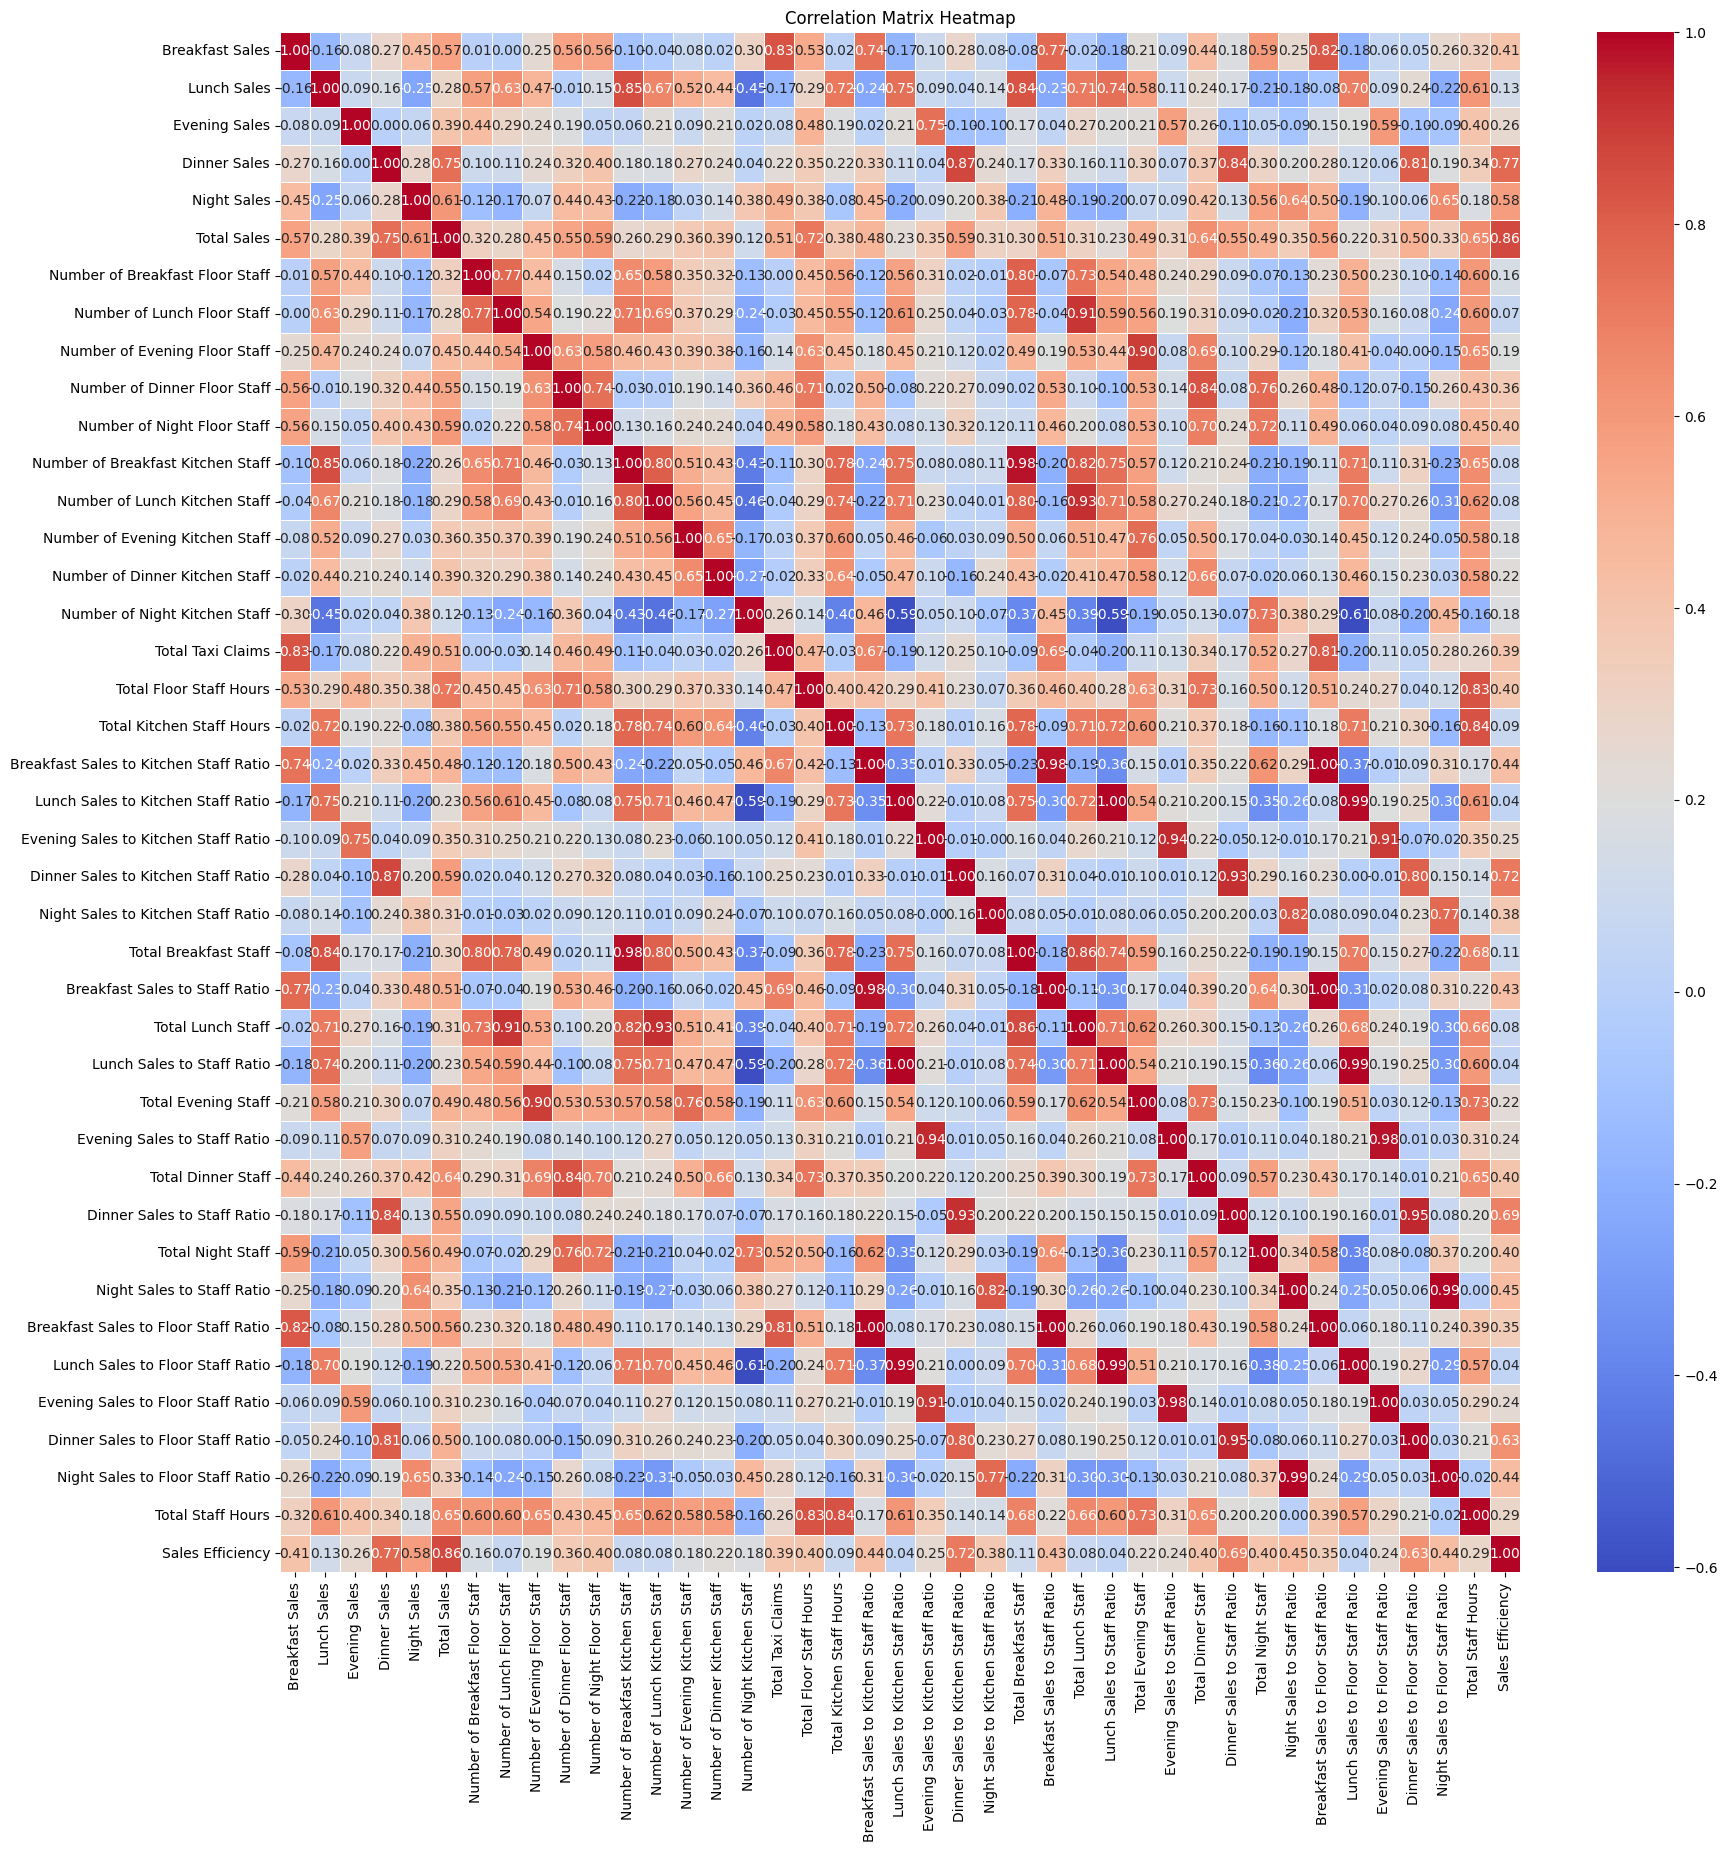

In [11]:
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
